## UMAP for GO Term vs TF-IDF Dataset for S. Cerevisiae genes


In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle as pkl
import base64
import csv

In [295]:
!pwd

/Users/adrianas/IBP


### Data Preprocessing
First: Check out dataset, sample (if necessary so that you don't overfit), and remove missing values.

In [ ]:
with open("geneOntologyDataset.pkl", 'rb') as inp:
    [pivoted, tfidfPivoted] = pkl.load(inp)

In [ ]:
genedata = pd.DataFrame(tfidfPivoted['P'].todense()) # F / P / C
genedata['Standard Name'] = pivoted['P'].index

In [ ]:
genedata.head().sample(10, axis=1)

In [143]:
genedata.shape

(4341, 2990)

Since UMAP cannot parse strings, we need to make sure that every string is either dropped or converted to a float:

In [ ]:
#genedata["Standard Name"] = pd.to_numeric(genedata["Standard Name"], downcast="float")

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()
c = le.fit_transform(genedata["Standard Name"])

In [ ]:
c #this here is now the newly transformed data column "Standard Name" into non-string values.

Now we can process the data by dropping and imputing. X and y will be used in UMAP (particularly X will be used in the data reduction, whereas y will be used in the supervised clustering as labels)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [ ]:
X, y= genedata.drop("Standard Name", axis=1) , genedata[["Standard Name"]].values.flatten()
pipe = make_pipeline(SimpleImputer(strategy="mean"))
X = pipe.fit_transform(X.copy())

### Data Reduction with Manifold:

In [ ]:
import umap.umap_ as umap

In [ ]:
#reducer = umap.UMAP()

In [ ]:
manifold = umap.UMAP().fit(X) #here we are using UMAP to fit the X data defined above(not reduced yet)
X_reduced = manifold.transform(X) #here we are transforming X using manifold (data reduction!)

In [ ]:
X_reduced.shape #running this will show that the data is now reduced to 2 dimensions

### Plot the results:

In [ ]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=c, s=0.5); #c= here is the label. If we give c we are assigning cluster label

Doing UMAP with merged dataset (Frequencies + GO Data) using the Frequencies as labels

In [ ]:
freqdata = pd.read_excel('41592_2018_45_MOESM4_ESM.xlsx', skiprows=6, engine='openpyxl')
freqdata.head()

In [ ]:
genes = freqdata['Standard Name'].dropna()

In [ ]:
fulldata = pd.merge(genedata, freqdata, on ="Standard Name", how = "left")

In [ ]:
fulldata #view how the data has merged together- the matrix dimension should only have changed in terms of number of columns

In [142]:
le = preprocessing.LabelEncoder() #use label encoder to transform the string data so as not to get errors with UMAP
c = le.fit_transform(fulldata["Standard Name"])
d = le.fit_transform(fulldata["Systematic Name"])

In [148]:
clusterLabels = np.digitize(fulldata['intensity'].values, fulldata['intensity'].quantile(np.linspace(0,1,10)).values) - 1
fulldata['cluster'] = clusterLabels #these will be later used in the c parameter in UMAP for the labels (supervised)

In [149]:
clusterLabels

array([6, 1, 0, ..., 7, 8, 8])

In [160]:
clusterLabels.shape #double check that the dimensions of the labels are correct- we don't want any errors!

(4341,)

In [204]:
X, y= genedata.drop("Standard Name", axis=1), genedata[["Standard Name"]].values.flatten()

In [205]:
pipe = make_pipeline(SimpleImputer(strategy="mean"))

In [206]:
X = pipe.fit_transform(X.copy())
manifold = umap.UMAP().fit(X, clusterLabels)
X_reduced = manifold.transform(X)

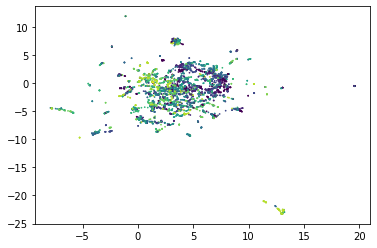

In [207]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusterLabels, s=0.5); #using clusterlabels! but not scaled!

In [208]:
y.shape

(4341,)

In [209]:
y

array(['AAC1', 'AAC3', 'AAD10', ..., 'ZTA1', 'ZUO1', 'ZWF1'], dtype=object)

In [285]:
from sklearn.preprocessing import StandardScaler

# Preprocess again this time with scaling the data
pipe = make_pipeline(SimpleImputer(strategy="mean"), QuantileTransformer()) #can change this to other types of scalers.
X = pipe.fit_transform(X.copy())

# Fit UMAP to processed data
manifold = umap.UMAP().fit(X, clusterLabels)
X_reduced_2 = manifold.transform(X)

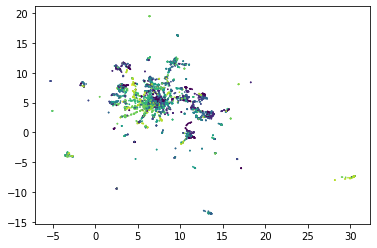

In [286]:
plt.scatter(X_reduced_2[:, 0], X_reduced_2[:, 1], c=clusterLabels, s=0.5);

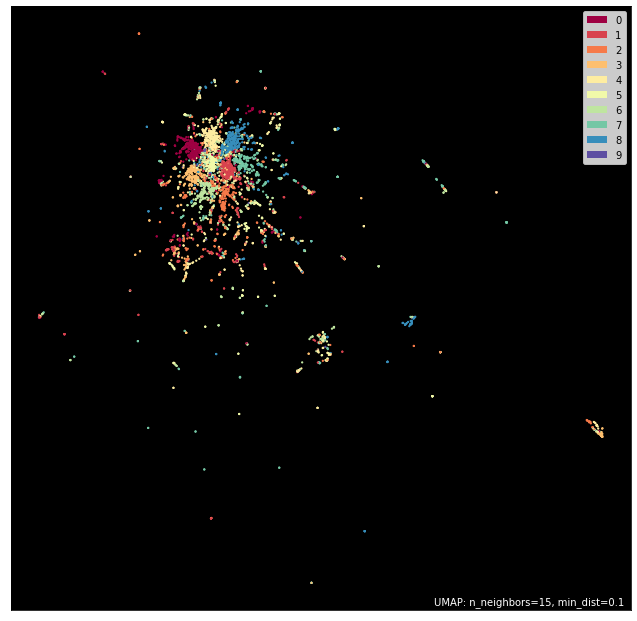

In [225]:
import umap.plot  # pip install umap-learn[plot]

umap.plot.points(manifold, labels=clusterLabels, theme="viridis");

In [213]:
%pip install umap-learn[plot] #fancy plotting package 

zsh:1: no matches found: umap-learn[plot]
Note: you may need to restart the kernel to use updated packages.


In [218]:
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
import datashader.bundling as bd
import matplotlib.pyplot as plt
import colorcet
import matplotlib.colors
import matplotlib.cm
import bokeh.plotting as bpl
import bokeh.transform as btr
import holoviews as hv
import holoviews.operation.datashader as hd

In [290]:
m = umap.UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [291]:
manifold = m.fit(X,y)
X_reduced_2 = manifold.transform(X)

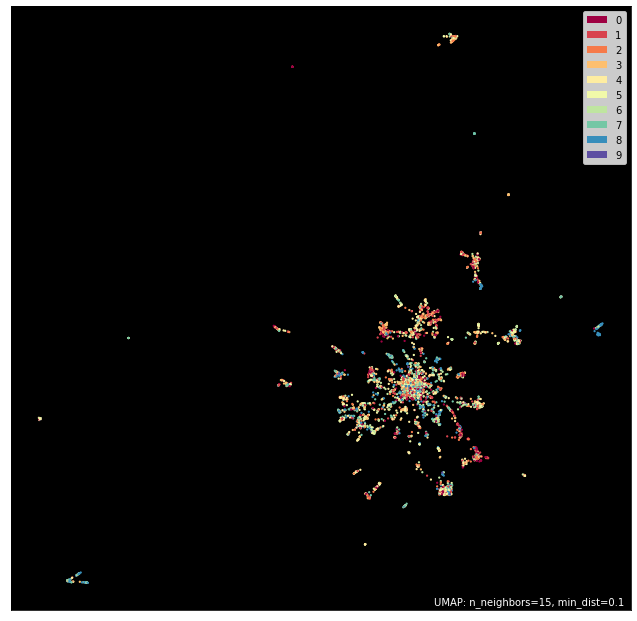

In [292]:
umap.plot.points(manifold, labels=clusterLabels, theme="viridis");

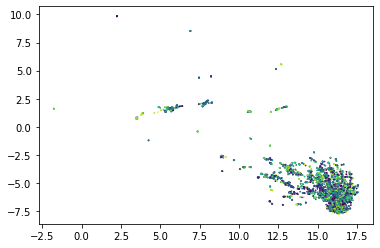

In [266]:
plt.scatter(X_reduced_2[:, 0], X_reduced_2[:, 1], c=clusterLabels, s=0.5);